<a href="https://colab.research.google.com/github/jimkliew/simple_factors/blob/main/Quick_Factors_ETFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **"60/40"** -- The simplest way to gain exposure to stocks and bonds. Think of this as the average portfolio. ##
*  VTI: Vanguard **Total Stock Market** ETF
*  IVV: iShares Core **S&P 500** ETF
*  BND: Vanguard **Total Bond Market** ETF
*  AGG: iShares Core **U.S. Aggregate Bond** ETF



---

Given your benchmark of **"60/40"**, now consider adding **"long-only factor"** exposures.

Equity Long-only Factors(Value, Momentum, Quality, Small, Low Vol.):
*  VTV (Vanguard **Value** ETF)
*  VUG (Vanguard **Growth** ETF)
*  MTUM (iShares MSCI USA **Momentum** Factor ETF)
*  QUAL (iShares Edge MSCI USA **Quality** Factor ETF)
*  IWM (iShares Russell 2000 ETF) (**"Small"**)
*  USMV (iShares MSCI USA Minimum Volatility ETF) ("**low vol.**")

Fixed Income Long-only Factors (Credit, Term, Inflation):
*  HYG (iShares iBoxx **High Yield** Corporate Bond ETF)
*  LQD (iShares iBoxx $ **Investment Grade** Corporate Bond ETF)
*  BIL (SPDR Bloomberg Barclays 1-3 Month **T-Bill** ETF)
*  TLT (iShares 20+ Year **Treasury Bond** ETF)
*  TIP (iShares **TIPS** Bond ETF)

---
The next iteration would be to take your 60/40 average portfolio and overlay each of the "long/short" factors thereby overlaying a cheap version of "alpha" on your average portfolio.


In [6]:
!pip install --upgrade nbformat nbconvert yfinance

In [7]:
!pip install yfinance pandas matplotlib

[*********************100%%**********************]  4 of 4 completed


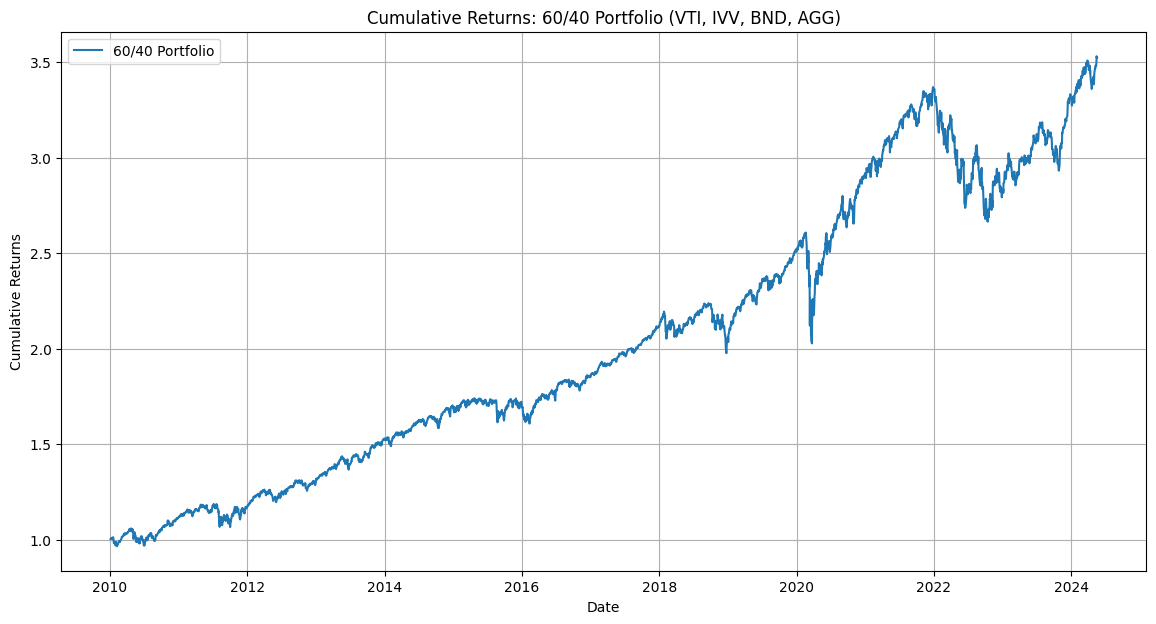

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers for the best and cheapest equity and bond ETFs
tickers = ['VTI', 'IVV', 'BND', 'AGG']

# Download historical data
data = yf.download(tickers, start='2010-01-01', end='2024-5-18')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Construct the 60/40 portfolio with the specified ETFs
weights_60_40 = {
    'VTI': 0.3, 'IVV': 0.3,
    'BND': 0.2, 'AGG': 0.2
}

# Calculate the 60/40 portfolio returns
portfolio_60_40 = (returns * pd.Series(weights_60_40)).sum(axis=1)

# Calculate cumulative returns for the 60/40 portfolio
cumulative_returns_60_40 = (1 + portfolio_60_40).cumprod()

# Plot cumulative returns for the 60/40 portfolio
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_60_40, label='60/40 Portfolio')
plt.title('Cumulative Returns: 60/40 Portfolio (VTI, IVV, BND, AGG)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()



[*********************100%%**********************]  14 of 14 completed


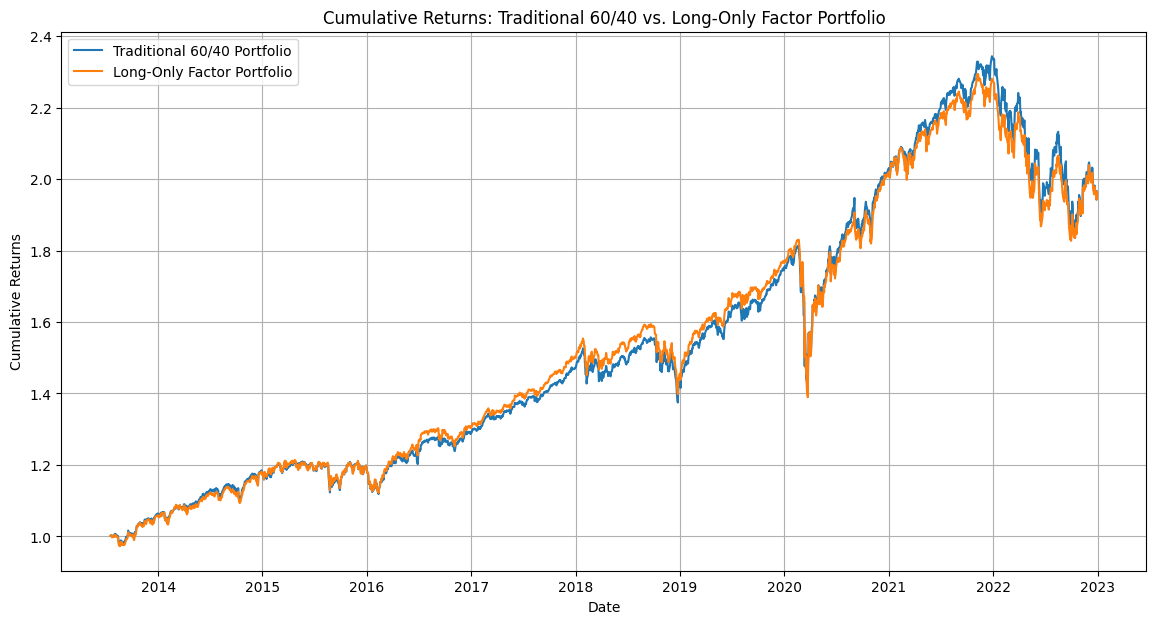

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers for the equity and bond factors
equity_factors = ['VTV', 'MTUM', 'QUAL', 'IWM', 'USMV']
bond_factors = ['HYG', 'LQD', 'BIL', 'TLT', 'TIP']

# Combine all tickers
all_tickers = equity_factors + bond_factors

# Download historical data
data = yf.download(all_tickers + ['VTI', 'IVV', 'BND', 'AGG'], start='2010-01-01', end='2023-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Construct the 60/40 traditional portfolio
weights_60_40 = {
    'VTI': 0.3, 'IVV': 0.3,
    'BND': 0.2, 'AGG': 0.2
}
portfolio_60_40 = (returns[['VTI', 'IVV', 'BND', 'AGG']] * pd.Series(weights_60_40)).sum(axis=1)
cumulative_returns_60_40 = (1 + portfolio_60_40).cumprod()

# Construct the long-only factor portfolio
weights_factors = {
    'VTV': 0.12, 'MTUM': 0.12, 'QUAL': 0.12, 'IWM': 0.12, 'USMV': 0.12,  # 60% allocation in total
    'HYG': 0.08, 'LQD': 0.08, 'BIL': 0.08, 'TLT': 0.08, 'TIP': 0.08  # 40% allocation in total
}
portfolio_factors = (returns[equity_factors + bond_factors] * pd.Series(weights_factors)).sum(axis=1)
cumulative_returns_factors = (1 + portfolio_factors).cumprod()

# Plot cumulative returns for both portfolios
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_60_40, label='Traditional 60/40 Portfolio')
plt.plot(cumulative_returns_factors, label='Long-Only Factor Portfolio')
plt.title('Cumulative Returns: Traditional 60/40 vs. Long-Only Factor Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


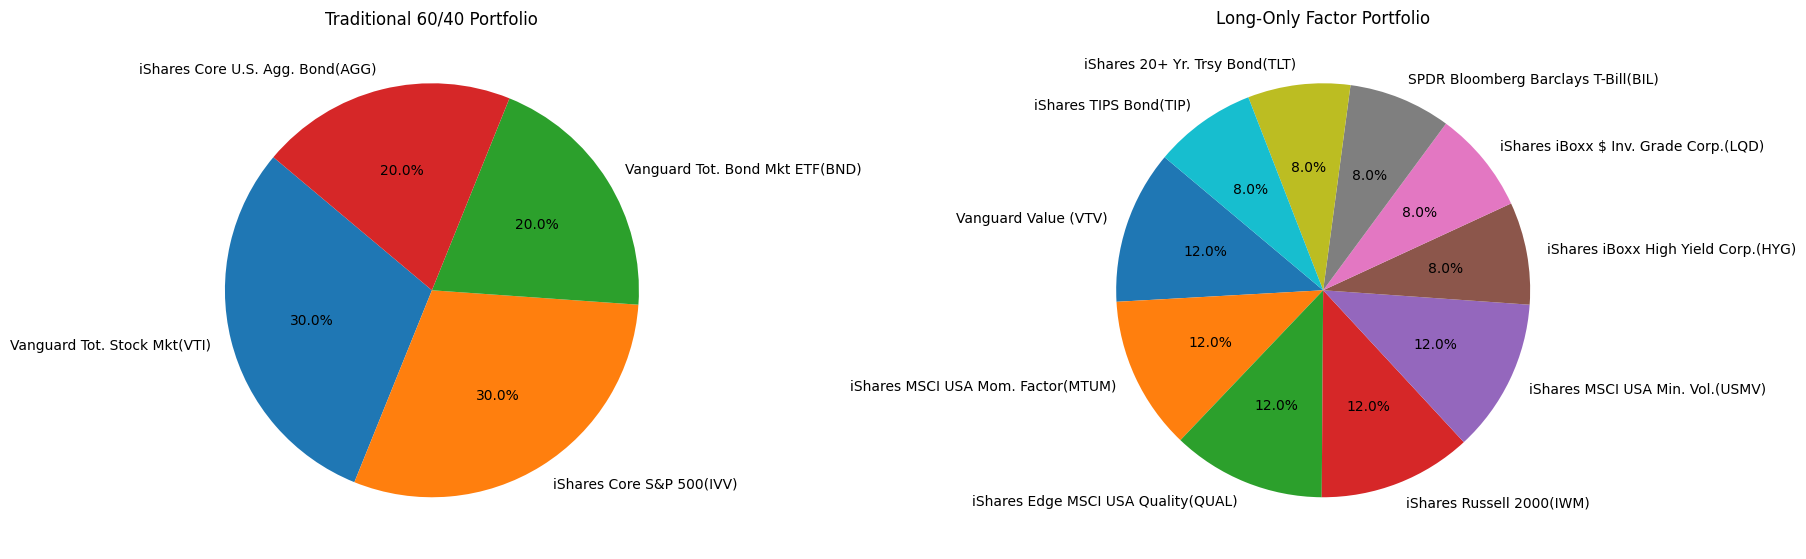

In [10]:
import matplotlib.pyplot as plt

# Define the full ETF names for the traditional 60/40 portfolio
traditional_names = [
    'Vanguard Tot. Stock Mkt(VTI)',
    'iShares Core S&P 500(IVV)',
    'Vanguard Tot. Bond Mkt ETF(BND)',
    'iShares Core U.S. Agg. Bond(AGG)'
]

traditional_weights = [0.3, 0.3, 0.2, 0.2]

# Define the full ETF names for the long-only factor portfolio
factor_names = [
    'Vanguard Value (VTV)',
    'iShares MSCI USA Mom. Factor(MTUM)',
    'iShares Edge MSCI USA Quality(QUAL)',
    'iShares Russell 2000(IWM)',
    'iShares MSCI USA Min. Vol.(USMV)',
    'iShares iBoxx High Yield Corp.(HYG)',
    'iShares iBoxx $ Inv. Grade Corp.(LQD)',
    'SPDR Bloomberg Barclays T-Bill(BIL)',
    'iShares 20+ Yr. Trsy Bond(TLT)',
    'iShares TIPS Bond(TIP)'
]

factor_weights = [0.12, 0.12, 0.12, 0.12, 0.12, 0.08, 0.08, 0.08, 0.08, 0.08]

# Plot the traditional 60/40 portfolio allocations
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.pie(traditional_weights, labels=traditional_names, autopct='%2.1f%%', startangle=140)
plt.title('Traditional 60/40 Portfolio')

# Plot the long-only factor portfolio allocations
plt.subplot(1, 2, 2)
plt.pie(factor_weights, labels=factor_names, autopct='%2.1f%%', startangle=140)
plt.title('Long-Only Factor Portfolio')

plt.tight_layout()
plt.show()


[*********************100%%**********************]  14 of 14 completed



Statistics for D rebalancing:
               Statistic  60/40 Portfolio  Long-Only Factor Portfolio
0      Cumulative Return         1.450428                    1.326639
1      Annualized Return         0.088673                    0.083786
2  Annualized Volatility         0.107878                    0.106995
3           Sharpe Ratio         0.821973                    0.783084

Statistics for W rebalancing:
               Statistic  60/40 Portfolio  Long-Only Factor Portfolio
0      Cumulative Return         1.435224                    1.309806
1      Annualized Return         0.087371                    0.083078
2  Annualized Volatility         0.105012                    0.110247
3           Sharpe Ratio         0.832010                    0.753564

Statistics for M rebalancing:
               Statistic  60/40 Portfolio  Long-Only Factor Portfolio
0      Cumulative Return         1.415760                    1.280558
1      Annualized Return         0.085958                    0.0806

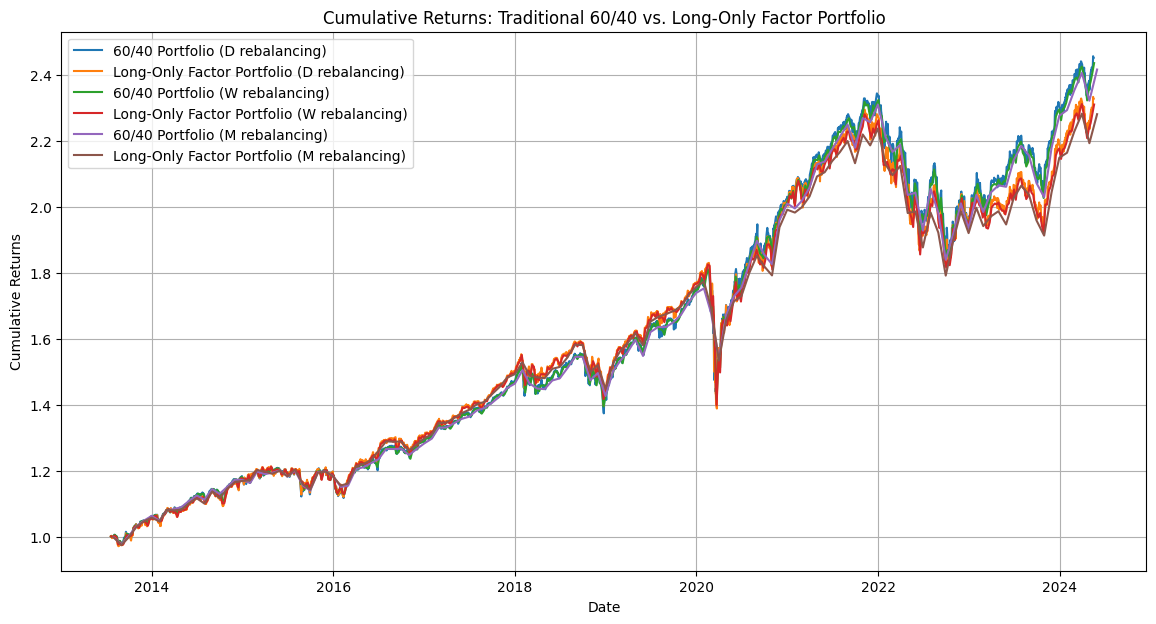

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def download_data(tickers, start_date='2010-01-01', end_date='2024-05-18'):
    return yf.download(tickers, start=start_date, end=end_date)['Adj Close']

def calculate_returns(prices, period='D'):
    returns = prices.pct_change().dropna()
    if period == 'D':
        return returns
    elif period == 'W':
        return returns.resample('W').apply(lambda x: (1 + x).prod() - 1)
    elif period == 'M':
        return returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
    else:
        raise ValueError("Invalid period. Use 'D', 'W', or 'M'.")

def portfolio_statistics(weights, returns, period):
    portfolio_returns = (returns * weights).sum(axis=1)
    cumulative_returns = (1 + portfolio_returns).cumprod()

    if period == 'D':
        annualization_factor = 252
    elif period == 'W':
        annualization_factor = 52
    elif period == 'M':
        annualization_factor = 12

    annualized_return = np.mean(portfolio_returns) * annualization_factor
    annualized_volatility = np.std(portfolio_returns) * np.sqrt(annualization_factor)
    sharpe_ratio = annualized_return / annualized_volatility
    return cumulative_returns, annualized_return, annualized_volatility, sharpe_ratio

def compare_portfolios(prices, periods):
    results = {}
    for period in periods:
        returns = calculate_returns(prices, period)

        # Traditional 60/40 Portfolio Weights
        weights_60_40 = pd.Series({'VTI': 0.3, 'IVV': 0.3, 'BND': 0.2, 'AGG': 0.2})

        # Long-Only Factor Portfolio Weights
        weights_factors = pd.Series({
            'VTV': 0.12, 'MTUM': 0.12, 'QUAL': 0.12, 'IWM': 0.12, 'USMV': 0.12,
            'HYG': 0.08, 'LQD': 0.08, 'BIL': 0.08, 'TLT': 0.08, 'TIP': 0.08
        })

        cum_ret_60_40, ann_ret_60_40, ann_vol_60_40, sharpe_60_40 = portfolio_statistics(weights_60_40, returns[weights_60_40.index], period)
        cum_ret_factors, ann_ret_factors, ann_vol_factors, sharpe_factors = portfolio_statistics(weights_factors, returns[weights_factors.index], period)

        stats = pd.DataFrame({
            'Statistic': ['Cumulative Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio'],
            '60/40 Portfolio': [cum_ret_60_40.iloc[-1] - 1, ann_ret_60_40, ann_vol_60_40, sharpe_60_40],
            'Long-Only Factor Portfolio': [cum_ret_factors.iloc[-1] - 1, ann_ret_factors, ann_vol_factors, sharpe_factors]
        })

        results[period] = (stats, cum_ret_60_40, cum_ret_factors)

    return results

# Download historical data
tickers = ['VTI', 'IVV', 'BND', 'AGG', 'VTV', 'MTUM', 'QUAL', 'IWM', 'USMV', 'HYG', 'LQD', 'BIL', 'TLT', 'TIP']
prices = download_data(tickers)

# Compare portfolios with daily, weekly, and monthly rebalancing
periods = ['D', 'W', 'M']
results = compare_portfolios(prices, periods)

# Display statistics for each period
for period in periods:
    print(f"\nStatistics for {period} rebalancing:")
    print(results[period][0])

# Plot cumulative returns for both portfolios with different rebalancing periods
plt.figure(figsize=(14, 7))

for period in periods:
    plt.plot(results[period][1], label=f'60/40 Portfolio ({period} rebalancing)')
    plt.plot(results[period][2], label=f'Long-Only Factor Portfolio ({period} rebalancing)')

plt.title('Cumulative Returns: Traditional 60/40 vs. Long-Only Factor Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  15 of 15 completed



Statistics for D rebalancing:
               Statistic  60/40 Portfolio  Long-Only Factor Portfolio  \
0      Cumulative Return         1.450428                    1.326639   
1      Annualized Return         0.088673                    0.083786   
2  Annualized Volatility         0.107878                    0.106995   
3           Sharpe Ratio         0.821973                    0.783084   

   Long/Short Factor Portfolio  
0                    -0.085014  
1                    -0.007900  
2                     0.024892  
3                    -0.317377  

Statistics for W rebalancing:
               Statistic  60/40 Portfolio  Long-Only Factor Portfolio  \
0      Cumulative Return         1.435224                    1.309806   
1      Annualized Return         0.087371                    0.083078   
2  Annualized Volatility         0.105012                    0.110247   
3           Sharpe Ratio         0.832010                    0.753564   

   Long/Short Factor Portfolio  
0       

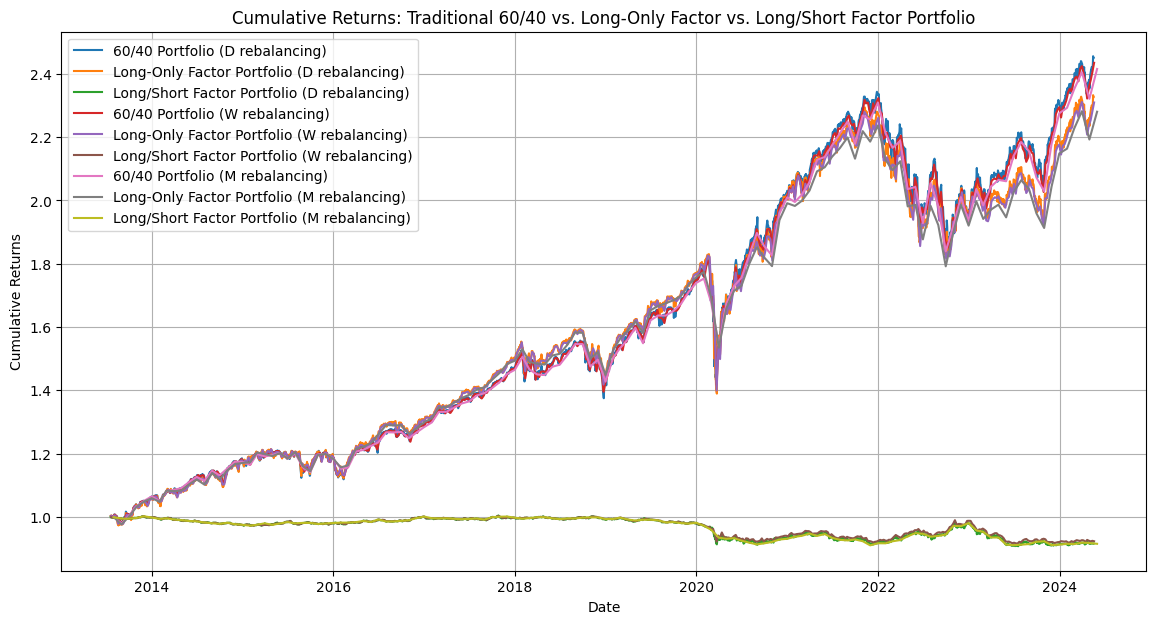

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def download_data(tickers, start_date='2010-01-01', end_date='2024-05-18'):
    return yf.download(tickers, start=start_date, end=end_date)['Adj Close']

def calculate_returns(prices, period='D'):
    returns = prices.pct_change().dropna()
    if period == 'D':
        return returns
    elif period == 'W':
        return returns.resample('W').apply(lambda x: (1 + x).prod() - 1)
    elif period == 'M':
        return returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
    else:
        raise ValueError("Invalid period. Use 'D', 'W', or 'M'.")

def portfolio_statistics(weights, returns, period):
    portfolio_returns = (returns * weights).sum(axis=1)
    cumulative_returns = (1 + portfolio_returns).cumprod()

    if period == 'D':
        annualization_factor = 252
    elif period == 'W':
        annualization_factor = 52
    elif period == 'M':
        annualization_factor = 12

    annualized_return = np.mean(portfolio_returns) * annualization_factor
    annualized_volatility = np.std(portfolio_returns) * np.sqrt(annualization_factor)
    sharpe_ratio = annualized_return / annualized_volatility
    return cumulative_returns, annualized_return, annualized_volatility, sharpe_ratio

def create_long_short_factors(returns):
    hml = returns['VTV'] - returns['VUG']
    smb = returns['IWM'] - returns['VTI']
    qal = returns['QUAL'] - returns['VTI']
    mom = returns['MTUM'] - returns['VTI']
    minvol = returns['USMV'] - returns['VTI']
    credit = 0.5 * (returns['HYG'] + returns['LQD']) - returns['TLT']
    term = returns['TLT'] - returns['BIL']
    inflation = returns['TIP'] - returns['TLT']

    factors = pd.DataFrame({
        'HML': hml,
        'SMB': smb,
        'QAL': qal,
        'MOM': mom,
        'MINVOL': minvol,
        'Credit': credit,
        'Term': term,
        'Inflation': inflation
    })

    return factors

def compare_portfolios(prices, periods):
    results = {}
    for period in periods:
        returns = calculate_returns(prices, period)

        # Traditional 60/40 Portfolio Weights
        weights_60_40 = pd.Series({'VTI': 0.3, 'IVV': 0.3, 'BND': 0.2, 'AGG': 0.2})

        # Long-Only Factor Portfolio Weights
        weights_factors = pd.Series({
            'VTV': 0.12, 'MTUM': 0.12, 'QUAL': 0.12, 'IWM': 0.12, 'USMV': 0.12,
            'HYG': 0.08, 'LQD': 0.08, 'BIL': 0.08, 'TLT': 0.08, 'TIP': 0.08
        })

        cum_ret_60_40, ann_ret_60_40, ann_vol_60_40, sharpe_60_40 = portfolio_statistics(weights_60_40, returns[weights_60_40.index], period)
        cum_ret_factors, ann_ret_factors, ann_vol_factors, sharpe_factors = portfolio_statistics(weights_factors, returns[weights_factors.index], period)

        # Create Long/Short Factors
        factors = create_long_short_factors(returns)

        # Example of using these factors in a portfolio (equal weights for simplicity)
        long_short_weights = pd.Series(1/len(factors.columns), index=factors.columns)
        cum_ret_long_short, ann_ret_long_short, ann_vol_long_short, sharpe_long_short = portfolio_statistics(long_short_weights, factors, period)

        stats = pd.DataFrame({
            'Statistic': ['Cumulative Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio'],
            '60/40 Portfolio': [cum_ret_60_40.iloc[-1] - 1, ann_ret_60_40, ann_vol_60_40, sharpe_60_40],
            'Long-Only Factor Portfolio': [cum_ret_factors.iloc[-1] - 1, ann_ret_factors, ann_vol_factors, sharpe_factors],
            'Long/Short Factor Portfolio': [cum_ret_long_short.iloc[-1] - 1, ann_ret_long_short, ann_vol_long_short, sharpe_long_short]
        })

        results[period] = (stats, cum_ret_60_40, cum_ret_factors, cum_ret_long_short)

    return results

# Download historical data
tickers = ['VTI', 'IVV', 'BND', 'AGG', 'VTV', 'VUG', 'MTUM', 'QUAL', 'IWM', 'USMV', 'HYG', 'LQD', 'BIL', 'TLT', 'TIP']
prices = download_data(tickers)

# Compare portfolios with daily, weekly, and monthly rebalancing
periods = ['D', 'W', 'M']
results = compare_portfolios(prices, periods)

# Display statistics for each period
for period in periods:
    print(f"\nStatistics for {period} rebalancing:")
    print(results[period][0])

# Plot cumulative returns for all portfolios with different rebalancing periods
plt.figure(figsize=(14, 7))

for period in periods:
    plt.plot(results[period][1], label=f'60/40 Portfolio ({period} rebalancing)')
    plt.plot(results[period][2], label=f'Long-Only Factor Portfolio ({period} rebalancing)')
    plt.plot(results[period][3], label=f'Long/Short Factor Portfolio ({period} rebalancing)')

plt.title('Cumulative Returns: Traditional 60/40 vs. Long-Only Factor vs. Long/Short Factor Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  15 of 15 completed



Statistics for D rebalancing:
               Statistic  60/40 Portfolio  Long-Only Factor Portfolio  \
0      Cumulative Return         1.450428                    1.326639   
1      Annualized Return         0.088673                    0.083786   
2  Annualized Volatility         0.107878                    0.106995   
3           Sharpe Ratio         0.821973                    0.783084   

   Long/Short Factor Portfolio  Volatility-Adjusted Combined Investment  
0                    -0.085014                                 0.636112  
1                    -0.007900                                 0.065785  
2                     0.024892                                 0.200954  
3                    -0.317377                                 0.327363  

Statistics for W rebalancing:
               Statistic  60/40 Portfolio  Long-Only Factor Portfolio  \
0      Cumulative Return         1.435224                    1.309806   
1      Annualized Return         0.087371               

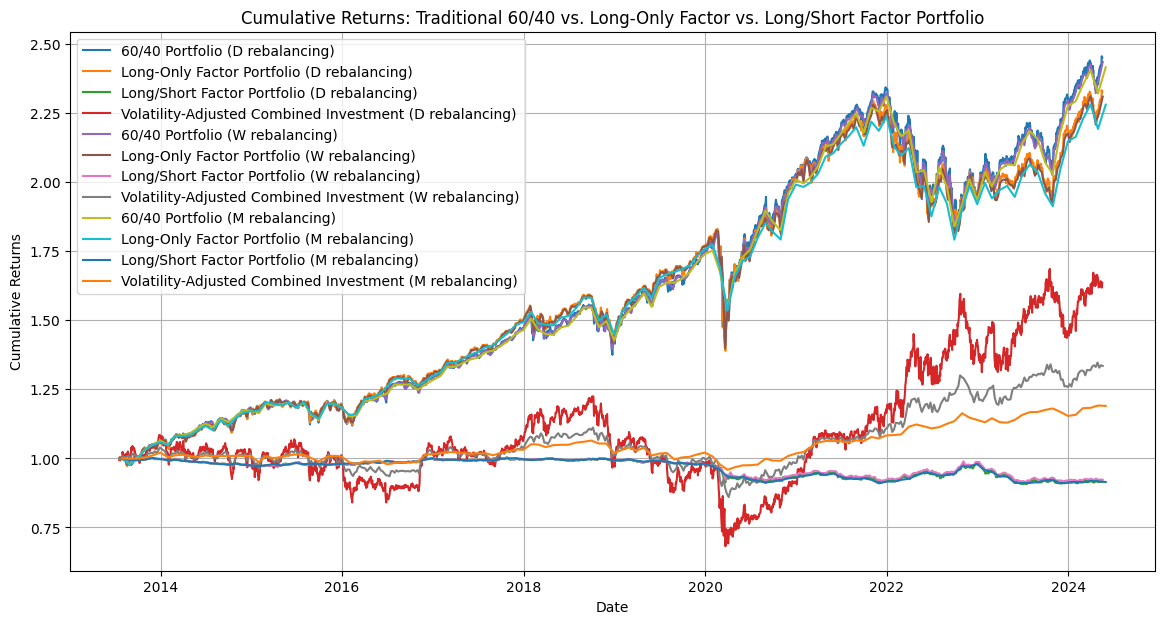

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def download_data(tickers, start_date='2010-01-01', end_date='2024-05-18'):
    return yf.download(tickers, start=start_date, end=end_date)['Adj Close']

def calculate_returns(prices, period='D'):
    returns = prices.pct_change().dropna()
    if period == 'D':
        return returns
    elif period == 'W':
        return returns.resample('W').apply(lambda x: (1 + x).prod() - 1)
    elif period == 'M':
        return returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
    else:
        raise ValueError("Invalid period. Use 'D', 'W', or 'M'.")

def portfolio_statistics(returns, period):
    cumulative_returns = (1 + returns).cumprod()

    if period == 'D':
        annualization_factor = 252
    elif period == 'W':
        annualization_factor = 52
    elif period == 'M':
        annualization_factor = 12

    annualized_return = np.mean(returns) * annualization_factor
    annualized_volatility = np.std(returns) * np.sqrt(annualization_factor)
    sharpe_ratio = annualized_return / annualized_volatility
    return cumulative_returns, annualized_return, annualized_volatility, sharpe_ratio

def create_long_short_factors(returns):
    hml = returns['VTV'] - returns['VUG']
    smb = returns['IWM'] - returns['VTI']
    qal = returns['QUAL'] - returns['VTI']
    mom = returns['MTUM'] - returns['VTI']
    minvol = returns['USMV'] - returns['VTI']
    credit = 0.5 * (returns['HYG'] + returns['LQD']) - returns['TLT']
    term = returns['TLT'] - returns['BIL']
    inflation = returns['TIP'] - returns['TLT']

    factors = pd.DataFrame({
        'HML': hml,
        'SMB': smb,
        'QAL': qal,
        'MOM': mom,
        'MINVOL': minvol,
        'Credit': credit,
        'Term': term,
        'Inflation': inflation
    })

    return factors

def volatility_adjust_returns(returns, target_vol=0.15):
    annualized_vol = np.std(returns) * np.sqrt(252)
    scale_factor = target_vol / annualized_vol
    return returns * scale_factor

def create_combined_investment(returns_A, returns_B, target_vol=0.15):
    adj_returns_A = volatility_adjust_returns(returns_A, target_vol)
    adj_returns_B = volatility_adjust_returns(returns_B, target_vol)
    combined_returns = adj_returns_A - adj_returns_B
    return combined_returns

def compare_portfolios(prices, periods):
    results = {}
    for period in periods:
        returns = calculate_returns(prices, period)

        # Traditional 60/40 Portfolio Weights
        weights_60_40 = pd.Series({'VTI': 0.3, 'IVV': 0.3, 'BND': 0.2, 'AGG': 0.2})

        # Long-Only Factor Portfolio Weights
        weights_factors = pd.Series({
            'VTV': 0.12, 'MTUM': 0.12, 'QUAL': 0.12, 'IWM': 0.12, 'USMV': 0.12,
            'HYG': 0.08, 'LQD': 0.08, 'BIL': 0.08, 'TLT': 0.08, 'TIP': 0.08
        })

        cum_ret_60_40, ann_ret_60_40, ann_vol_60_40, sharpe_60_40 = portfolio_statistics((returns[weights_60_40.index] * weights_60_40).sum(axis=1), period)
        cum_ret_factors, ann_ret_factors, ann_vol_factors, sharpe_factors = portfolio_statistics((returns[weights_factors.index] * weights_factors).sum(axis=1), period)

        # Create Long/Short Factors
        factors = create_long_short_factors(returns)

        # Example of using these factors in a portfolio (equal weights for simplicity)
        long_short_weights = pd.Series(1/len(factors.columns), index=factors.columns)
        cum_ret_long_short, ann_ret_long_short, ann_vol_long_short, sharpe_long_short = portfolio_statistics((factors * long_short_weights).sum(axis=1), period)

        # Adjust long/short factors to match volatility
        adj_factors = factors.apply(volatility_adjust_returns, target_vol=0.15)

        # Combine a pair of investments with adjusted volatility
        combined_investments = create_combined_investment(returns['VTI'], returns['BND'], target_vol=0.15)
        cum_ret_combined, ann_ret_combined, ann_vol_combined, sharpe_combined = portfolio_statistics(combined_investments, period)

        stats = pd.DataFrame({
            'Statistic': ['Cumulative Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio'],
            '60/40 Portfolio': [cum_ret_60_40.iloc[-1] - 1, ann_ret_60_40, ann_vol_60_40, sharpe_60_40],
            'Long-Only Factor Portfolio': [cum_ret_factors.iloc[-1] - 1, ann_ret_factors, ann_vol_factors, sharpe_factors],
            'Long/Short Factor Portfolio': [cum_ret_long_short.iloc[-1] - 1, ann_ret_long_short, ann_vol_long_short, sharpe_long_short],
            'Volatility-Adjusted Combined Investment': [cum_ret_combined.iloc[-1] - 1, ann_ret_combined, ann_vol_combined, sharpe_combined]
        })

        results[period] = (stats, cum_ret_60_40, cum_ret_factors, cum_ret_long_short, cum_ret_combined)

    return results

# Download historical data
tickers = ['VTI', 'IVV', 'BND', 'AGG', 'VTV', 'VUG', 'MTUM', 'QUAL', 'IWM', 'USMV', 'HYG', 'LQD', 'BIL', 'TLT', 'TIP']
prices = download_data(tickers)

# Compare portfolios with daily, weekly, and monthly rebalancing
periods = ['D', 'W', 'M']
results = compare_portfolios(prices, periods)

# Display statistics for each period
for period in periods:
    print(f"\nStatistics for {period} rebalancing:")
    print(results[period][0])

# Plot cumulative returns for all portfolios with different rebalancing periods
plt.figure(figsize=(14, 7))

for period in periods:
    plt.plot(results[period][1], label=f'60/40 Portfolio ({period} rebalancing)')
    plt.plot(results[period][2], label=f'Long-Only Factor Portfolio ({period} rebalancing)')
    plt.plot(results[period][3], label=f'Long/Short Factor Portfolio ({period} rebalancing)')
    plt.plot(results[period][4], label=f'Volatility-Adjusted Combined Investment ({period} rebalancing)')

plt.title('Cumulative Returns: Traditional 60/40 vs. Long-Only Factor vs. Long/Short Factor Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  13 of 13 completed



Statistics for monthly rebalancing:
               Statistic  60/40 Portfolio  Long-Only Factor Portfolio  \
0      Cumulative Return         1.379526                    1.280558   
1      Annualized Return         0.084662                    0.080694   
2  Annualized Volatility         0.099807                    0.099204   
3           Sharpe Ratio         0.848250                    0.813415   

   60/40 with Long/Short Factor Overlay  
0                              1.105492  
1                              0.073289  
2                              0.098641  
3                              0.742987  


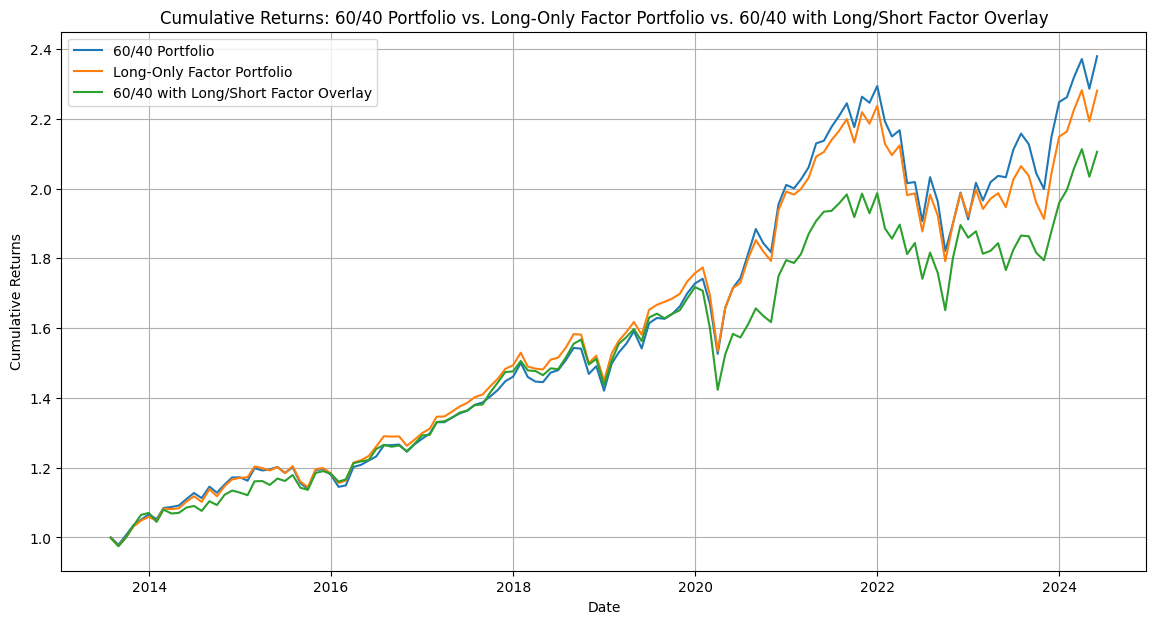

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def download_data(tickers, start_date='2010-01-01', end_date='2024-05-18'):
    return yf.download(tickers, start=start_date, end=end_date)['Adj Close']

def calculate_returns(prices, period='M'):
    returns = prices.pct_change().dropna()
    if period == 'D':
        return returns
    elif period == 'W':
        return returns.resample('W').apply(lambda x: (1 + x).prod() - 1)
    elif period == 'M':
        return returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
    else:
        raise ValueError("Invalid period. Use 'D', 'W', or 'M'.")

def portfolio_statistics(returns, period='M'):
    cumulative_returns = (1 + returns).cumprod()

    if period == 'D':
        annualization_factor = 252
    elif period == 'W':
        annualization_factor = 52
    elif period == 'M':
        annualization_factor = 12

    annualized_return = np.mean(returns) * annualization_factor
    annualized_volatility = np.std(returns) * np.sqrt(annualization_factor)
    sharpe_ratio = annualized_return / annualized_volatility
    return cumulative_returns, annualized_return, annualized_volatility, sharpe_ratio

def create_long_short_factors(returns, target_vol=0.15):
    factors = pd.DataFrame({
        'HML': volatility_adjust_returns(returns['VTV'] - returns['VUG'], target_vol),
        'SMB': volatility_adjust_returns(returns['IWM'] - returns['VTI'], target_vol),
        'QAL': volatility_adjust_returns(returns['QUAL'] - returns['VTI'], target_vol),
        'MOM': volatility_adjust_returns(returns['MTUM'] - returns['VTI'], target_vol),
        'MINVOL': volatility_adjust_returns(returns['USMV'] - returns['VTI'], target_vol),
        'Credit': volatility_adjust_returns(0.5 * (returns['HYG'] + returns['LQD']) - returns['TLT'], target_vol),
        'Term': volatility_adjust_returns(returns['TLT'] - returns['BIL'], target_vol),
        'Inflation': volatility_adjust_returns(returns['TIP'] - returns['TLT'], target_vol)
    })
    return factors

def volatility_adjust_returns(returns, target_vol=0.15):
    annualized_vol = np.std(returns) * np.sqrt(12)
    scale_factor = target_vol / annualized_vol
    return returns * scale_factor

def compare_portfolios(prices, period='M'):
    returns = calculate_returns(prices, period)

    # Traditional 60/40 Portfolio Weights (using VTI and AGG)
    weights_60_40 = pd.Series({'VTI': 0.6, 'AGG': 0.4})

    cum_ret_60_40, ann_ret_60_40, ann_vol_60_40, sharpe_60_40 = portfolio_statistics((returns[weights_60_40.index] * weights_60_40).sum(axis=1), period)

    # Create Long/Short Factors
    factors = create_long_short_factors(returns)

    # Long-Only Factor Portfolio Weights
    weights_factors = pd.Series({
        'VTV': 0.12, 'MTUM': 0.12, 'QUAL': 0.12, 'IWM': 0.12, 'USMV': 0.12,
        'HYG': 0.08, 'LQD': 0.08, 'BIL': 0.08, 'TLT': 0.08, 'TIP': 0.08
    })
    cum_ret_factors, ann_ret_factors, ann_vol_factors, sharpe_factors = portfolio_statistics((returns[weights_factors.index] * weights_factors).sum(axis=1), period)

    # Adjusted Long/Short Factor Portfolio
    long_short_weights = pd.Series(1/len(factors.columns), index=factors.columns)
    cum_ret_long_short, ann_ret_long_short, ann_vol_long_short, sharpe_long_short = portfolio_statistics((factors * long_short_weights).sum(axis=1), period)

    # 60/40 Portfolio with Long/Short Factor Overlay
    combined_returns = ((returns[weights_60_40.index] * weights_60_40).sum(axis=1)) + ((factors * long_short_weights).sum(axis=1))
    cum_ret_combined, ann_ret_combined, ann_vol_combined, sharpe_combined = portfolio_statistics(combined_returns, period)

    stats = pd.DataFrame({
        'Statistic': ['Cumulative Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio'],
        '60/40 Portfolio': [cum_ret_60_40.iloc[-1] - 1, ann_ret_60_40, ann_vol_60_40, sharpe_60_40],
        'Long-Only Factor Portfolio': [cum_ret_factors.iloc[-1] - 1, ann_ret_factors, ann_vol_factors, sharpe_factors],
        '60/40 with Long/Short Factor Overlay': [cum_ret_combined.iloc[-1] - 1, ann_ret_combined, ann_vol_combined, sharpe_combined]
    })

    results = (stats, cum_ret_60_40, cum_ret_factors, cum_ret_combined)
    return results

# Download historical data
tickers = ['VTI', 'AGG', 'VTV', 'VUG', 'MTUM', 'QUAL', 'IWM', 'USMV', 'HYG', 'LQD', 'BIL', 'TLT', 'TIP']
prices = download_data(tickers)

# Compare portfolios with monthly rebalancing
results = compare_portfolios(prices, period='M')

# Display statistics
print("\nStatistics for monthly rebalancing:")
print(results[0])

# Plot cumulative returns for all portfolios
plt.figure(figsize=(14, 7))

plt.plot(results[1], label='60/40 Portfolio')
plt.plot(results[2], label='Long-Only Factor Portfolio')
plt.plot(results[3], label='60/40 with Long/Short Factor Overlay')

plt.title('Cumulative Returns: 60/40 Portfolio vs. Long-Only Factor Portfolio vs. 60/40 with Long/Short Factor Overlay')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  13 of 13 completed



Statistics for monthly rebalancing:
               Statistic  60/40 Portfolio  Long-Only Factor Portfolio  \
0      Cumulative Return         1.379526                    1.280558   
1      Annualized Return         0.084662                    0.080694   
2  Annualized Volatility         0.099807                    0.099204   
3           Sharpe Ratio         0.848250                    0.813415   

   60/40 with Long/Short Factor Overlay  
0                              0.692822  
1                              0.055178  
2                              0.116403  
3                              0.474028  


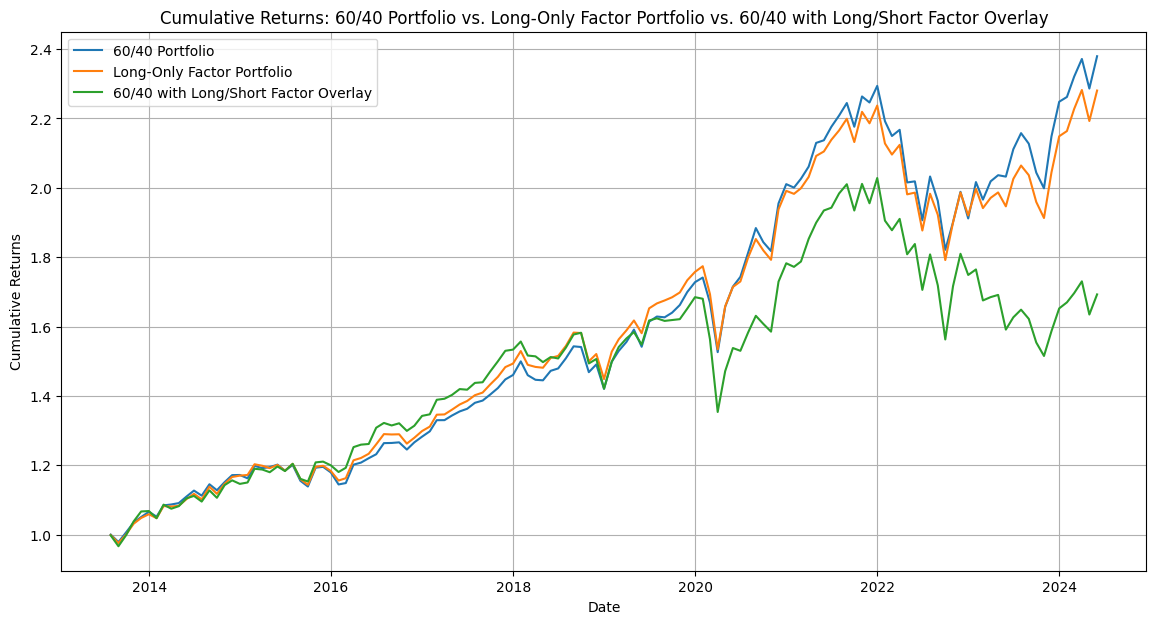

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def download_data(tickers, start_date='2010-01-01', end_date='2024-05-18'):
    return yf.download(tickers, start=start_date, end=end_date)['Adj Close']

def calculate_returns(prices, period='M'):
    returns = prices.pct_change().dropna()
    if period == 'D':
        return returns
    elif period == 'W':
        return returns.resample('W').apply(lambda x: (1 + x).prod() - 1)
    elif period == 'M':
        return returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
    else:
        raise ValueError("Invalid period. Use 'D', 'W', or 'M'.")

def portfolio_statistics(returns, period='M'):
    cumulative_returns = (1 + returns).cumprod()

    if period == 'D':
        annualization_factor = 252
    elif period == 'W':
        annualization_factor = 52
    elif period == 'M':
        annualization_factor = 12

    annualized_return = np.mean(returns) * annualization_factor
    annualized_volatility = np.std(returns) * np.sqrt(annualization_factor)
    sharpe_ratio = annualized_return / annualized_volatility
    return cumulative_returns, annualized_return, annualized_volatility, sharpe_ratio

def volatility_adjust_returns(returns, target_vol=0.15):
    annualized_vol = np.std(returns) * np.sqrt(12)
    scale_factor = target_vol / annualized_vol
    return returns * scale_factor

def create_long_short_factors(returns, target_vol=0.15):
    vtv_adj = volatility_adjust_returns(returns['VTV'], target_vol)
    vug_adj = volatility_adjust_returns(returns['VUG'], target_vol)
    iwm_adj = volatility_adjust_returns(returns['IWM'], target_vol)
    vti_adj = volatility_adjust_returns(returns['VTI'], target_vol)
    qual_adj = volatility_adjust_returns(returns['QUAL'], target_vol)
    mtum_adj = volatility_adjust_returns(returns['MTUM'], target_vol)
    usmv_adj = volatility_adjust_returns(returns['USMV'], target_vol)
    hyg_adj = volatility_adjust_returns(returns['HYG'], target_vol)
    lqd_adj = volatility_adjust_returns(returns['LQD'], target_vol)
    tlt_adj = volatility_adjust_returns(returns['TLT'], target_vol)
    bil_adj = volatility_adjust_returns(returns['BIL'], target_vol)
    tip_adj = volatility_adjust_returns(returns['TIP'], target_vol)

    hml = volatility_adjust_returns(vtv_adj - vug_adj, target_vol)
    smb = volatility_adjust_returns(iwm_adj - vti_adj, target_vol)
    qal = volatility_adjust_returns(qual_adj - vti_adj, target_vol)
    mom = volatility_adjust_returns(mtum_adj - vti_adj, target_vol)
    minvol = volatility_adjust_returns(usmv_adj - vti_adj, target_vol)
    credit = volatility_adjust_returns(0.5 * (hyg_adj + lqd_adj) - tlt_adj, target_vol)
    term = volatility_adjust_returns(tlt_adj - bil_adj, target_vol)
    inflation = volatility_adjust_returns(tip_adj - tlt_adj, target_vol)

    factors = pd.DataFrame({
        'HML': hml,
        'SMB': smb,
        'QAL': qal,
        'MOM': mom,
        'MINVOL': minvol,
        'Credit': credit,
        'Term': term,
        'Inflation': inflation
    })

    return factors

def compare_portfolios(prices, period='M'):
    returns = calculate_returns(prices, period)

    # Traditional 60/40 Portfolio Weights (using VTI and AGG)
    weights_60_40 = pd.Series({'VTI': 0.6, 'AGG': 0.4})

    cum_ret_60_40, ann_ret_60_40, ann_vol_60_40, sharpe_60_40 = portfolio_statistics((returns[weights_60_40.index] * weights_60_40).sum(axis=1), period)

    # Create Long/Short Factors
    factors = create_long_short_factors(returns)

    # Long-Only Factor Portfolio Weights
    weights_factors = pd.Series({
        'VTV': 0.12, 'MTUM': 0.12, 'QUAL': 0.12, 'IWM': 0.12, 'USMV': 0.12,
        'HYG': 0.08, 'LQD': 0.08, 'BIL': 0.08, 'TLT': 0.08, 'TIP': 0.08
    })
    cum_ret_factors, ann_ret_factors, ann_vol_factors, sharpe_factors = portfolio_statistics((returns[weights_factors.index] * weights_factors).sum(axis=1), period)

    # Adjusted Long/Short Factor Portfolio
    long_short_weights = pd.Series(1/len(factors.columns), index=factors.columns)
    cum_ret_long_short, ann_ret_long_short, ann_vol_long_short, sharpe_long_short = portfolio_statistics((factors * long_short_weights).sum(axis=1), period)

    # 60/40 Portfolio with Long/Short Factor Overlay
    combined_returns = ((returns[weights_60_40.index] * weights_60_40).sum(axis=1)) + ((factors * long_short_weights).sum(axis=1))
    cum_ret_combined, ann_ret_combined, ann_vol_combined, sharpe_combined = portfolio_statistics(combined_returns, period)

    stats = pd.DataFrame({
        'Statistic': ['Cumulative Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio'],
        '60/40 Portfolio': [cum_ret_60_40.iloc[-1] - 1, ann_ret_60_40, ann_vol_60_40, sharpe_60_40],
        'Long-Only Factor Portfolio': [cum_ret_factors.iloc[-1] - 1, ann_ret_factors, ann_vol_factors, sharpe_factors],
        '60/40 with Long/Short Factor Overlay': [cum_ret_combined.iloc[-1] - 1, ann_ret_combined, ann_vol_combined, sharpe_combined]
    })

    results = (stats, cum_ret_60_40, cum_ret_factors, cum_ret_combined)
    return results

# Download historical data
tickers = ['VTI', 'AGG', 'VTV', 'VUG', 'MTUM', 'QUAL', 'IWM', 'USMV', 'HYG', 'LQD', 'BIL', 'TLT', 'TIP']
prices = download_data(tickers)

# Compare portfolios with monthly rebalancing
results = compare_portfolios(prices, period='M')

# Display statistics
print("\nStatistics for monthly rebalancing:")
print(results[0])

# Plot cumulative returns for all portfolios
plt.figure(figsize=(14, 7))

plt.plot(results[1], label='60/40 Portfolio')
plt.plot(results[2], label='Long-Only Factor Portfolio')
plt.plot(results[3], label='60/40 with Long/Short Factor Overlay')

plt.title('Cumulative Returns: 60/40 Portfolio vs. Long-Only Factor Portfolio vs. 60/40 with Long/Short Factor Overlay')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()
